In [1]:
# the python toolkit for data analysis and visualistion. 
# more or less to doing library(tidyverse) (without going into details).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# the dataset
# R: ratings <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-25/ratings.csv')
#    details <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-25/details.csv')
ratings = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-25/ratings.csv')
details = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-25/details.csv')

In [3]:
# R: dplyr::glimpse(ratings)
ratings.dtypes

num                int64
id                 int64
name              object
year               int64
rank               int64
average          float64
bayes_average    float64
users_rated        int64
url               object
thumbnail         object
dtype: object

In [4]:
# R: dplyr::glimpse(details)
details.dtypes

num                         int64
id                          int64
primary                    object
description                object
yearpublished               int64
minplayers                  int64
maxplayers                  int64
playingtime                 int64
minplaytime                 int64
maxplaytime                 int64
minage                      int64
boardgamecategory          object
boardgamemechanic          object
boardgamefamily            object
boardgameexpansion         object
boardgameimplementation    object
boardgamedesigner          object
boardgameartist            object
boardgamepublisher         object
owned                       int64
trading                     int64
wanting                     int64
wishing                     int64
dtype: object

The instructions on the [Tidy Tuesday repo](https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-01-25/readme.md) say that two datasets can be joined on the id column. Let's start with that.

In [5]:
# R: boardgames <- dplyr::left_join(ratings, details, by = c("id" = "id"))

boardgames = pd.merge(ratings, details, how='left', on = 'id')

In [6]:
# We now have a merged dataset.
boardgames.shape

(21831, 32)

In [7]:
boardgames.head(10)

,num_x,id,name,year,rank,average,bayes_average,users_rated,url,thumbnail,...,boardgamefamily,boardgameexpansion,boardgameimplementation,boardgamedesigner,boardgameartist,boardgamepublisher,owned,trading,wanting,wishing
0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,...,"['Components: Map (Global Scale)', 'Components...",['Pandemic: Gen Con 2016 Promos – Z-Force Team...,"['Pandemic Legacy: Season 0', 'Pandemic Legacy...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...",168364.0,2508.0,625.0,9344.0
1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,...,"['Cities: Carcassonne (France)', 'Components: ...","['20 Jahre Darmstadt Spielt', 'Apothecaries (f...","['The Ark of the Covenant', 'Carcassonne für 2...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",161299.0,1716.0,582.0,7383.0
2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,...,"['Animals: Sheep', 'Components: Hexagonal Tile...","['20 Jahre Darmstadt Spielt', 'Brettspiel Adve...","['Baden-Württemberg Catan', 'Catan Geographies...",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...",167733.0,2018.0,485.0,5890.0
3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...,...,"['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...","['7 Wonders: Armada', '7 Wonders: Babel', '7 W...","['7 Wonders (Second Edition)', '7 Wonders Duel...",['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",120466.0,1567.0,1010.0,12105.0
4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...,...,"['Crowdfunding: Wspieram', 'Game: Dominion', '...","['Ancient Times (fan expansion for Dominion)',...","['Dominion (Second Edition)', 'Het Koninkrijk ...",['Donald X. Vaccarino'],"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",106956.0,2009.0,655.0,8621.0
5,191,9209,Ticket to Ride,2004,192,7.41,7.305,76171,/boardgame/9209/ticket-ride,https://cf.geekdo-images.com/ZWJg0dCdrWHxVnc0e...,...,['Components: Map (Continental / National scal...,"['Alaska (fan expansion for Ticket to Ride)', ...","['Les Aventuriers du Rail Express', 'Ticket to...",['Alan R. Moon'],"['Cyrille Daujean', 'Julien Delval']","['Days of Wonder', 'ADC Blackfire Entertainmen...",105748.0,930.0,692.0,6620.0
6,100,178900,Codenames,2015,101,7.60,7.508,74419,/boardgame/178900/codenames,https://cf.geekdo-images.com/F_KDEu0GjdClml8N7...,...,"['Game: Codenames', 'Mechanism: Give a Clue / ...","['Brettspiel Adventskalender 2018', 'Codenames...",['Codenames: Blizzard Edition'],['Vlaada Chvátil'],"['Stéphane Gantiez', 'Tomáš Kučerovský', 'Fili...","['Czech Games Edition', 'Asmodee', 'Bergsala E...",119753.0,1110.0,340.0,5764.0
7,3,167791,Terraforming Mars,2016,4,8.42,8.274,74216,/boardgame/167791/terraforming-mars,https://cf.geekdo-images.com/wg9oOLcsKvDesSUdZ...,...,"['Components: Map (Global Scale)', 'Components...",['French Championship Promo Cards (fan expansi...,"['Terraforming Mars: Ares Expedition', 'Terraf...",['Jacob Fryxelius'],['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Brädspel.se', 'Fant...",101872.0,538.0,2011.0,19227.0
8,15,173346,7 Wonders Duel,2015,16,8.11,7.984,69472,/boardgame/173346/7-wonders-duel,https://cf.geekdo-images.com/WzNs1mA_o22ZWTR8f...,...,"['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...","['7 Wonders Duel: Agora', '7 Wonders Duel: Pan...",['7 Wonders'],"['Antoine Bauza', 'Bruno Cathala']",['Miguel Coimbra'],"['Repos Production', 'ADC Blackfi

I know very little of boargames. I think a good place to start is to see a distribution of years the games have been relesased.

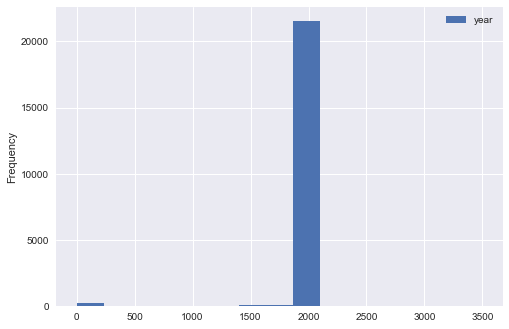

In [8]:
# R: ggplot(boardgames) +
#      aes(x = year) +
#      geom_histogram(bins = 15) +
#      theme_minimal()

plt.style.use('seaborn')
fig, ax = plt.subplots()
boardgames.plot(kind = "hist", y = "year", bins = 15, ax = ax);

It is a strange looking plot. It seems that there are really old boargames (Chess?), but also, some values around year 3000. That has to be a mistake.

So, first let's remove rows that have value bigger than 2022 for year. 

Then, maybe a good idea would be to split the dataset to see old vs new games. Let's use 1945 as a break year.

In [9]:
# R boardgames <- boardgames %>% 
#     filter(year <= 2022)

boardgames = boardgames.query('year <= 2022')

In [10]:
boardgames.shape

(21823, 32)

In [11]:
boardgames_old = boardgames.query('year <= 1945')
boardgames_old.shape

(390, 32)

In [12]:
boardgames_new = boardgames.query('year > 1945')
boardgames_new.shape

(21433, 32)

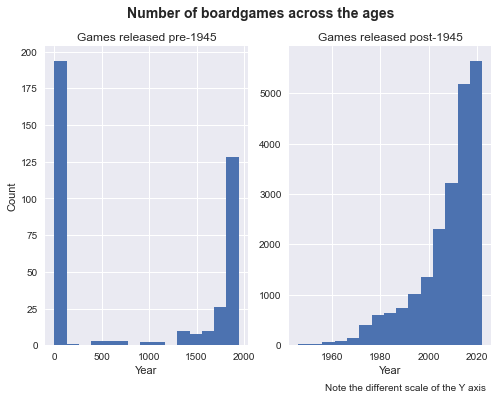

In [13]:
# R:
# p1 <- ggplot(boardgames_old) +
#  aes(x = year) +
#  geom_histogram() + 
#  theme_minimal()


# p2 <- ggplot(boardgames_new) +
#  aes(x = year) +
#  geom_histogram() + 
#  theme_minimal()


# patch_plot <- patchwork::wrap_plots(p1, p2)

# patch_plot + patchwork::plot_annotation(
#  title = "Number of boardgames across the ages",
#  caption = "Note the different scale of the Y axis")


plt.style.use('seaborn') 

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2) # ax0 and ax1 will be the used for different data

boardgames_old.plot(kind = "hist", y = "year", bins = 15, ax = ax0)

ax0.set(title = "Games released pre-1945", 
       xlabel = "Year",
       ylabel = "Count"
      )

boardgames_new.plot(kind = "hist", y = "year", bins = 15, ax = ax1)

ax1.set(title = "Games released post-1945", 
       xlabel = "Year",
       ylabel = ""
      )

# Title the figure
fig.suptitle('Number of boardgames across the ages', fontsize=14, fontweight='bold')

# Hide the legends
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

txt="Note the different scale of the Y axis"
fig.text(0.75, 0.01, txt, ha='center');

/tmp/ipykernel_14834/1713376890.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boardgames["period"] = np.where(boardgames["year"] <= 1945, "old", "new")


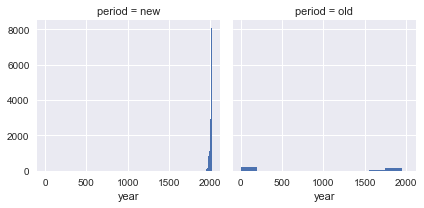

In [14]:
# Another aproach in R would be to use facets:
# R: boardgames <- boardgames %>% 
# mutate(period = if_else(year <= 1945, "old", "new"))

# ggplot(boardgames) +
#   aes(x = year) +
#   geom_histogram() +
#   facet_wrap(vars(period), ncol = 2, scales = "free_y") +
#   theme_minimal()


boardgames["period"] = np.where(boardgames["year"] <= 1945, "old", "new")

import seaborn as sns #importing seaborn as mutpiple places reference it for plotting facets

plt.style.use("seaborn") 
plot = sns.FacetGrid(boardgames, col = "period")
plot.map(plt.hist, "year");

# Leaving labels, titles, etc. for another time.

I think the more interesting part is the old boargames. There seem to be games with year 0. I assume these are games for which we don't have records about their origin, but we still play today.

In [15]:
boardgames_old[['year', 'name']].sort_values(by = ['year']).head(20)

,year,name
21789,0,Monopoly: My Marvel Heroes
9203,0,Maxi Yatzy
17345,0,Manille
17322,0,Tute
9291,0,Freecell
17295,0,Makruk
9598,0,Nya Finans
9940,0,Truco
17242,0,Yoté
10427,0,iGranie z Gruzem


While some of thise may be really old (like Freecell?), other seem to be more recent games for which the year field is wrongly recorded (Master Quiz, Sweet Mess?).

Let's see what is going on with the year 0 removed.

In [16]:
boardgames_old = boardgames_old.query('year > 0')
boardgames_old.shape
boardgames_old.reset_index(inplace = True)

In [17]:
# R:
# boardgames %>% 
#   select(year, name) %>% 
#   arrange(year)

boardgames_old[['year', 'name']].sort_values(by = ['year']).head(20)

,year,name
164,100,Petteia
16,200,Chutes and Ladders
32,400,Hnefatafl
14,400,Pachisi
124,500,Yut Nori
65,550,Oware
126,550,Chaturanga
111,600,Mia
50,700,Go-Moku
11,700,Kalah


In [18]:
boardgames_old[['year', 'name']].sort_values(by = ['year'], ascending=False).head(20)

,year,name
104,1945,Jägersro
95,1943,Tjuv och polis
30,1943,Super Farmer
168,1942,Nok-Hockey
49,1942,Hex
174,1941,Foto-Electric Football
108,1941,All-Star Baseball
130,1940,Conflict
115,1940,Spare Time Bowling
37,1940,Labyrinth


Really interesting that in the 1940s there were games called `Conflict` and `Machiavelli`. 

OK. Let's what game has the highest average rating and game rank. 

In [19]:
# R: boardgames_old %>% 
#  arrange(desc(rank)) %>% 
#  slice_head(n=1) %>% 
#  select(name, year, rank, average)

# boardgames_old %>% 
#  arrange(desc(average)) %>% 
#  slice_head(n=1) %>% 
#  select(name, year, rank, average)


boardgames_old[["name", "year", "rank", "average"]].sort_values(by = ['rank'], ascending=False).head(1)



,name,year,rank,average
18,Tic-Tac-Toe,1300,21830,2.7


In [20]:
boardgames_old[["name", "year", "rank", "average"]].sort_values(by = ['average'], ascending=False).head(1)


,name,year,rank,average
188,The von Reisswitz Kriegsspiel: The Prussian Ar...,1824,10921,8.24


A Prussian army war game wins the day.